# Part 2: Classification with CNN
1. Image data introduction (Fashion MNIST)
2. Data analysis & preprocessing
3. Defining the network structure
4. Model fitting:
    1. Without regularization
    2. With regularization
5. Model evaluation on test set (classification report)

# Import packages

In [179]:
# Packages for working with data
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from IPython.display import Image

# Model-related packages
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential,Model # model objects
from tensorflow.keras.layers import Input, Dense, Flatten # feedforward layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D # convolutional layers
from tensorflow.keras.layers import BatchNormalization, Dropout # normalization
from tensorflow.keras.layers import LeakyReLU # activation function
from tensorflow.keras.utils import to_categorical

%matplotlib inline

# Prepare data

In [180]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


### Fashion MNIST images

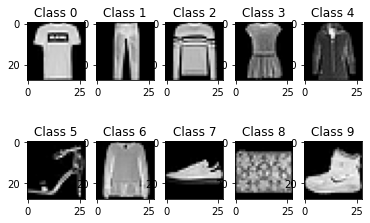

In [181]:
fig, ax = plt.subplots(2, 5)
class_counter = 0
for i in range(2):
	for j in range(5):
	# plt.subplot(330 + 1 + i)
		ind = np.where(train_Y == class_counter)[0][0]
		ax[i,j].imshow(train_X[ind], cmap=plt.get_cmap('gray'))
		ax[i,j].title.set_text('Class {}'.format(class_counter))
		class_counter += 1
fig.show()

### Each training and test example is assigned to one of the following labels:

0: T-shirt/top              

1: Trouser

2: Pullover

3: Dress

4: Coat

5: Sandal

6: Shirt

7: Sneaker

8: Bag

9: Ankle boot

### Prepare data for input layer

In [182]:
# reshape training input
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

# set input data type
train_X = train_X.astype('float32') 
test_X = test_X.astype('float32')

# rescale pixel values to [0,1]
train_X = train_X / 255.
test_X = test_X / 255.

In [183]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

print('Original label:', train_Y[3])
print('After conversion to one-hot:', train_Y_one_hot[3])

Original label: 3
After conversion to one-hot: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


### Split data into training/evaluation sets

In [184]:
from sklearn.model_selection import train_test_split
train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

# Convolutional Neural Network

![title](../images/cnn.png)

# Model 1: Smaller network
      
#### Convolutional layer 1: 16 filters  
  
#### Fully connected layer: 16 nodes

In [185]:
train_X_small = train_X[:5000]
train_label_small = train_label[:5000]

valid_X_small = valid_X[:2500]
valid_label_small = valid_label[:2500]

In [186]:
batch_size = 64
epochs = 20
num_classes = 10

cnn_small = Sequential()
cnn_small.add(Conv2D(16, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
cnn_small.add(LeakyReLU(alpha=0.1))                  
cnn_small.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_small.add(Flatten())
cnn_small.add(Dense(16, activation='linear'))
cnn_small.add(LeakyReLU(alpha=0.1))                  
cnn_small.add(Dense(num_classes, activation='softmax'))

In [187]:
cnn_small.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [188]:
cnn_small.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                50192     
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 16)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

## Train model 1

In [189]:
cnn_train_small = cnn_small.fit(train_X_small, train_label_small, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X_small, valid_label_small))

Epoch 1/20
79/79 [==============================] - 1s 9ms/step - loss: 1.1896 - accuracy: 0.6102 - val_loss: 0.7226 - val_accuracy: 0.7440
Epoch 2/20
79/79 [==============================] - 1s 9ms/step - loss: 0.6047 - accuracy: 0.7902 - val_loss: 0.5711 - val_accuracy: 0.8104
Epoch 3/20
79/79 [==============================] - 1s 8ms/step - loss: 0.5053 - accuracy: 0.8200 - val_loss: 0.5065 - val_accuracy: 0.8220
Epoch 4/20
79/79 [==============================] - 1s 8ms/step - loss: 0.4717 - accuracy: 0.8378 - val_loss: 0.5119 - val_accuracy: 0.8168
Epoch 5/20
79/79 [==============================] - 1s 8ms/step - loss: 0.4316 - accuracy: 0.8520 - val_loss: 0.4923 - val_accuracy: 0.8280
Epoch 6/20
79/79 [==============================] - 1s 8ms/step - loss: 0.4037 - accuracy: 0.8568 - val_loss: 0.4546 - val_accuracy: 0.8424
Epoch 7/20
79/79 [==============================] - 1s 8ms/step - loss: 0.3746 - accuracy: 0.8718 - val_loss: 0.4280 - val_accuracy: 0.8504
Epoch 8/20
79/79 [==

## Model 1 evaluation

In [190]:
test_eval_small = cnn_small.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval_small[0])
print('Test accuracy:', test_eval_small[1])

Test loss: 0.41544950008392334
Test accuracy: 0.8636999726295471


### Plot training history

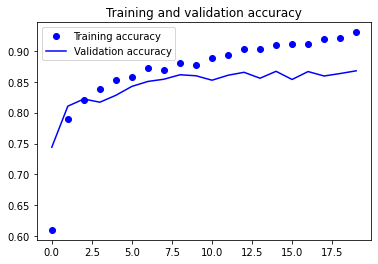

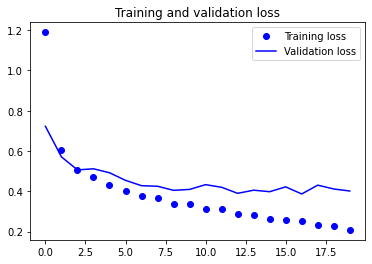

In [191]:
accuracy = cnn_train_small.history['accuracy']
val_accuracy = cnn_train_small.history['val_accuracy']
loss = cnn_train_small.history['loss']
val_loss = cnn_train_small.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Classification report

In [45]:
predicted_classes = cnn_small.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [46]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

precision    recall  f1-score   support

     Class 0       0.64      0.88      0.74      1000
     Class 1       0.98      0.96      0.97      1000
     Class 2       0.83      0.77      0.80      1000
     Class 3       0.89      0.82      0.85      1000
     Class 4       0.81      0.74      0.77      1000
     Class 5       0.96      0.94      0.95      1000
     Class 6       0.68      0.61      0.64      1000
     Class 7       0.88      0.96      0.92      1000
     Class 8       0.96      0.95      0.96      1000
     Class 9       0.97      0.90      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



Class 0: T-shirt

Class 4: Coat

Class 6: Shirt

# Model 2: Larger Network

#### Convolutional layer 1: 32 filters
#### Convolutional layer 2: 64 filters
#### Convolutional layer 3: 128 filters
#### Fully connected layer: 128 nodes

In [16]:
batch_size = 64
epochs = 20
num_classes = 10

cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
cnn.add(LeakyReLU(alpha=0.1))
cnn.add(MaxPooling2D((2, 2),padding='same'))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
cnn.add(LeakyReLU(alpha=0.1))
cnn.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
cnn.add(LeakyReLU(alpha=0.1))                  
cnn.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn.add(Dropout(0.4))
cnn.add(Flatten())
cnn.add(Dense(128, activation='linear'))
cnn.add(LeakyReLU(alpha=0.1))           
cnn.add(Dropout(0.3))
cnn.add(Dense(num_classes, activation='softmax'))  # we want 10 outputs between 0 and 1

In [17]:
cnn.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [18]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)         

## Train model 2

In [19]:
import time
t0 = time.time()
cnn_train = cnn.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))
t1 = time.time()
tt = np.round((t1 - t0)/60,2)
print('\n Training time: {}'.format(tt) + ' minutes.')

Epoch 1/20
750/750 [==============================] - 27s 35ms/step - loss: 0.6043 - accuracy: 0.7725 - val_loss: 0.4046 - val_accuracy: 0.8476
Epoch 2/20
750/750 [==============================] - 27s 36ms/step - loss: 0.3795 - accuracy: 0.8592 - val_loss: 0.3156 - val_accuracy: 0.8816
Epoch 3/20
750/750 [==============================] - 27s 36ms/step - loss: 0.3286 - accuracy: 0.8781 - val_loss: 0.2917 - val_accuracy: 0.8913
Epoch 4/20
750/750 [==============================] - 29s 38ms/step - loss: 0.3006 - accuracy: 0.8881 - val_loss: 0.2681 - val_accuracy: 0.9026
Epoch 5/20
750/750 [==============================] - 27s 36ms/step - loss: 0.2815 - accuracy: 0.8937 - val_loss: 0.2537 - val_accuracy: 0.9046
Epoch 6/20
750/750 [==============================] - 26s 35ms/step - loss: 0.2697 - accuracy: 0.8994 - val_loss: 0.2414 - val_accuracy: 0.9112
Epoch 7/20
750/750 [==============================] - 28s 37ms/step - loss: 0.2575 - accuracy: 0.9041 - val_loss: 0.2431 - val_accuracy:

## Model 2 evaluation

In [20]:
test_eval = cnn.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.2200128436088562
Test accuracy: 0.9194999933242798


### Plot training history

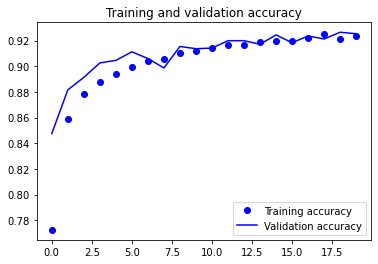

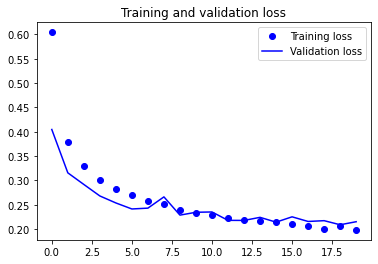

In [21]:
accuracy = cnn_train.history['accuracy']
val_accuracy = cnn_train.history['val_accuracy']
loss = cnn_train.history['loss']
val_loss = cnn_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Classification report

In [22]:
predicted_classes = cnn.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [23]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

precision    recall  f1-score   support

     Class 0       0.80      0.87      0.83      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.87      0.89      0.88      1000
     Class 3       0.94      0.90      0.92      1000
     Class 4       0.88      0.85      0.87      1000
     Class 5       0.99      0.98      0.99      1000
     Class 6       0.77      0.75      0.76      1000
     Class 7       0.97      0.97      0.97      1000
     Class 8       0.99      0.98      0.99      1000
     Class 9       0.97      0.98      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



## Visualise feature maps

In [152]:
model = cnn
model = Model(inputs=model.inputs, outputs=model.layers[1].output)

In [153]:
# img = train_X[7]
img = train_X[3]
feature_maps = model.predict(img)

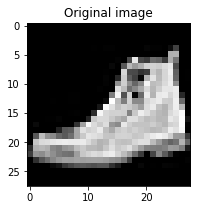

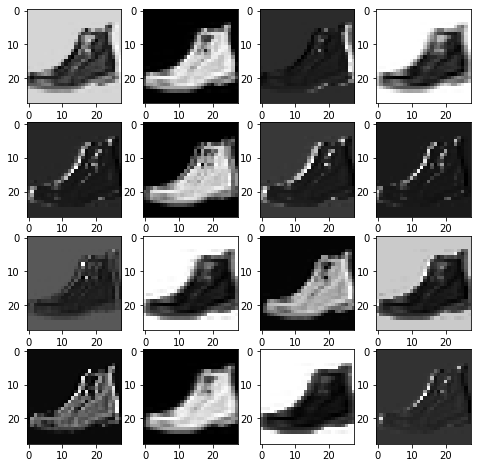

In [177]:
img = train_X[3]
# img = train_X[16]

f, ax = plt.subplots(figsize=(3,3))
ax.imshow(img,cmap=plt.get_cmap('gray'))
ax.set_title('Original image')

feature_maps = model.predict(img)
square = 8
ix = 1
fig, ax = plt.subplots(4, 4, figsize=(8,8))
for i in range(4):
    for j in range(4):
        # ax.set_xticks([])
        # ax.set_yticks([])
        ax[i,j].imshow(feature_maps[:, :, :, ix-1],cmap=plt.get_cmap('gray'))
        fig.show()
        ix += 1